# Image Preprocessing Pipeline – CIFAR-10

This notebook demonstrates a custom image preprocessing pipeline for color images.
Each transformation is applied step-by-step, visualized, and analyzed by printing
image shapes and pixel value ranges.


In [1]:
!pip install torch torchvision opencv-python matplotlib numpy

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [3]:
dataset = torchvision.datasets.CIFAR10(
    root='./data',
    train=False,
    download=True,
    transform=transforms.ToTensor()
)

img1, _ = dataset[0]
img2, _ = dataset[1]


100%|██████████| 170M/170M [00:01<00:00, 103MB/s]


In [4]:
def show_image(img, title):
    img_np = img.permute(1, 2, 0).numpy()
    print(f"{title} → Shape: {img.shape}, Pixel Range: [{img.min():.3f}, {img.max():.3f}]")
    plt.imshow(img_np, cmap='gray')
    plt.title(title)
    plt.axis('off')


In [5]:
resize = transforms.Resize((64, 64))
img1_r = resize(img1)
img2_r = resize(img2)


In [6]:
gray = transforms.Grayscale(num_output_channels=1)
img1_g = gray(img1_r)
img2_g = gray(img2_r)

In [7]:
rotate = transforms.RandomRotation(30)
img1_rot = rotate(img1_g)
img2_rot = rotate(img2_g)

In [8]:
flip = transforms.RandomHorizontalFlip(p=1.0)
img1_f = flip(img1_rot)
img2_f = flip(img2_rot)


In [9]:
normalize = transforms.Normalize(mean=[0.5], std=[0.5])
img1_n = normalize(img1_f)
img2_n = normalize(img2_f)


In [10]:
def sharpen(img):
    img_np = img.squeeze().numpy()
    kernel = np.array([[0, -1, 0],
                       [-1, 5, -1],
                       [0, -1, 0]])
    sharp = cv2.filter2D(img_np, -1, kernel)
    return torch.tensor(sharp).unsqueeze(0)

img1_s = sharpen(img1_n)
img2_s = sharpen(img2_n)


Resized - Image 1 → Shape: torch.Size([3, 64, 64]), Pixel Range: [0.072, 0.985]
Resized - Image 2 → Shape: torch.Size([3, 64, 64]), Pixel Range: [0.000, 0.954]
Grayscale - Image 1 → Shape: torch.Size([1, 64, 64]), Pixel Range: [0.147, 0.981]
Grayscale - Image 2 → Shape: torch.Size([1, 64, 64]), Pixel Range: [0.001, 0.938]
Rotated - Image 1 → Shape: torch.Size([1, 64, 64]), Pixel Range: [0.000, 0.981]
Rotated - Image 2 → Shape: torch.Size([1, 64, 64]), Pixel Range: [0.000, 0.936]
Flipped - Image 1 → Shape: torch.Size([1, 64, 64]), Pixel Range: [0.000, 0.981]
Flipped - Image 2 → Shape: torch.Size([1, 64, 64]), Pixel Range: [0.000, 0.936]
Normalized - Image 1 → Shape: torch.Size([1, 64, 64]), Pixel Range: [-1.000, 0.963]
Normalized - Image 2 → Shape: torch.Size([1, 64, 64]), Pixel Range: [-1.000, 0.873]
Sharpened - Image 1 → Shape: torch.Size([1, 64, 64]), Pixel Range: [-5.493, 2.374]
Sharpened - Image 2 → Shape: torch.Size([1, 64, 64]), Pixel Range: [-6.594, 4.603]


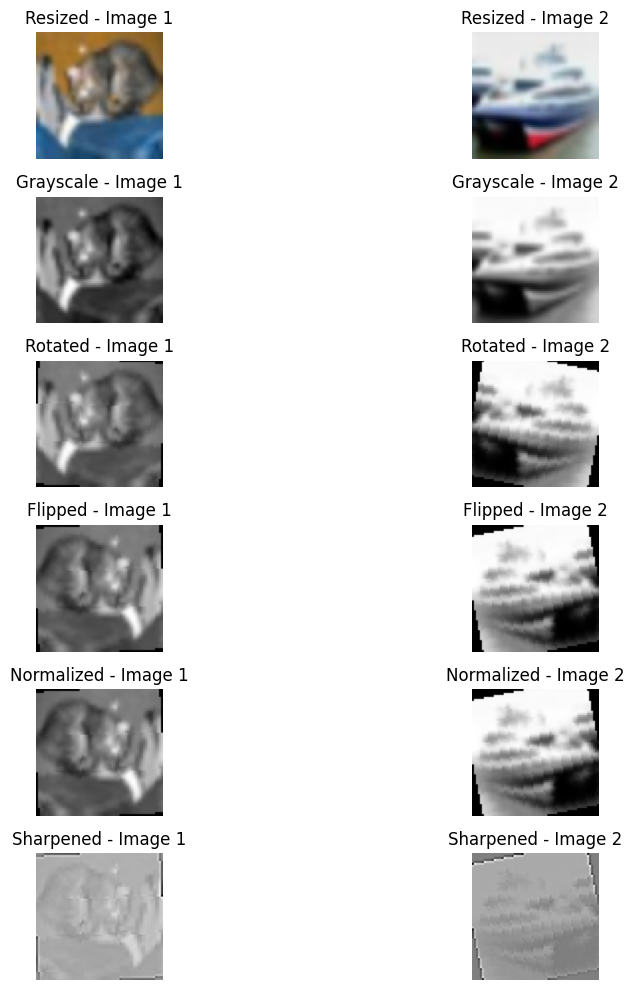

In [11]:
steps = [
    ("Resized", img1_r, img2_r),
    ("Grayscale", img1_g, img2_g),
    ("Rotated", img1_rot, img2_rot),
    ("Flipped", img1_f, img2_f),
    ("Normalized", img1_n, img2_n),
    ("Sharpened", img1_s, img2_s)
]

plt.figure(figsize=(12, 10))
for i, (title, a, b) in enumerate(steps):
    plt.subplot(len(steps), 2, i*2 + 1)
    show_image(a, f"{title} - Image 1")
    plt.subplot(len(steps), 2, i*2 + 2)
    show_image(b, f"{title} - Image 2")

plt.tight_layout()
plt.show()


In [12]:
final_tensor = torch.stack([img1_s, img2_s])
print("Final Tensor Shape:", final_tensor.shape)

Final Tensor Shape: torch.Size([2, 1, 64, 64])
